## 🏠 Part I. King County House Prices — Data Cleaning/Feature Selection

This notebook demonstrates a workflow to build a regression model to predict house prices based on their characteristics

- Data cleaning
- Feature engineering
- Model training and evaluation

In [2]:
# Basic package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train/Test split
from sklearn.model_selection import train_test_split

# Normalization/Standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Classfier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC

# Ensemble methods
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1️⃣ Load and inspect the dataset

In [3]:
df=pd.read_csv(r"C:\Users\SAMSUNG\Desktop\Project2\king_ country_ houses_aa.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house=df.copy()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [6]:
#none
#['id', 'date']

#numerical variables
num=house[['id', 'date', 'yr_built', 'yr_renovated', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'lat', 'long', 'zipcode', 'bedrooms', 'bathrooms','floors']]

#categorical variables
cat=house[[ 'waterfront', 'view', 'condition', 'grade' ]]

#target variable
#['price']

In [7]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   yr_built       21613 non-null  int64  
 3   yr_renovated   21613 non-null  int64  
 4   price          21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   sqft_living15  21613 non-null  int64  
 10  sqft_lot15     21613 non-null  int64  
 11  lat            21613 non-null  float64
 12  long           21613 non-null  float64
 13  zipcode        21613 non-null  int64  
 14  bedrooms       21613 non-null  int64  
 15  bathrooms      21613 non-null  float64
 16  floors         21613 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 

In [8]:
num.describe()

,id,yr_built,yr_renovated,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,lat,long,zipcode,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,1971.005136,84.402258,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045,1986.552492,12768.455652,47.560053,-122.213896,98077.939805,3.370842,2.114757,1.494309
std,2.876566e+09,29.373411,401.679240,3.671272e+05,918.440897,4.142051e+04,828.090978,442.575043,685.391304,27304.179631,0.138564,0.140828,53.505026,0.930062,0.770163,0.539989
min,1.000102e+06,1900.000000,0.000000,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000,47.155900,-122.519000,98001.000000,0.000000,0.000000,1.000000
25%,2.123049e+09,1951.000000,0.000000,3.219500e+05,1427.000000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000,47.471000,-122.328000,98033.000000,3.000000,1.750000,1.000000
50%,3.904930e+09,1975.000000,0.000000,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1840.000000,7620.000000,47.571800,-122.230000,98065.000000,3.000000,2.250000,1.500000
75%,7.308900e+09,1997.000000,0.000000,6.450000e+05,2550.000000,1.068800e+04,2210.000000,560.000000,2360.000000,10083.000000,47.678000,-122.125000,98118.000000,4.000000,2.500000,2.000000
max,9.900000e+09,2015.000000,2015.000000,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000,47.777600,-121.315000,98199.000000,33.000000,8.000000,3.500000


In [9]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   waterfront  21613 non-null  int64
 1   view        21613 non-null  int64
 2   condition   21613 non-null  int64
 3   grade       21613 non-null  int64
dtypes: int64(4)
memory usage: 675.5 KB


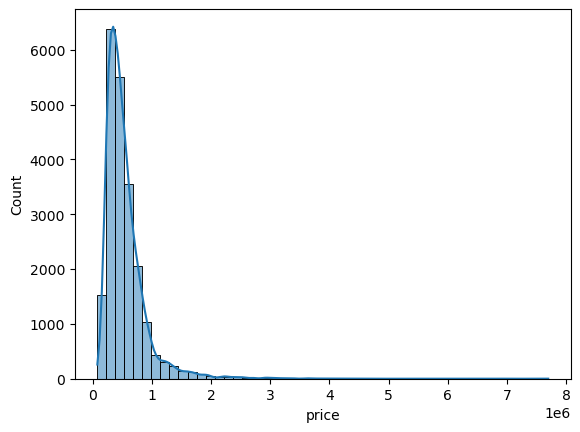

In [10]:
sns.histplot(house['price'], bins=50, kde=True)
plt.show()

In [11]:
#Outlier?
Q1 = house['price'].quantile(0.25)
Q3 = house['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-162625.0 1129575.0


## 2️⃣ Data cleaning & exploring

In [12]:
#missing values = 0
house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#count duplicate rows = 0
house.duplicated().sum()

np.int64(0)

In [14]:
#find 177 duplicates in 'id' columns
house.duplicated(subset=['id']).value_counts()

False    21436
True       177
Name: count, dtype: int64

In [15]:
house['bedrooms'].value_counts().sort_index()
#13 house where the number of bedroom is 0

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [16]:
house['bathrooms'].value_counts().sort_index()
#10 house where the number of bedroom is 0

bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64

In [17]:
house[((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]
#16 houses where either bathroom or bedroom is 0

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
5832,5702500050,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050


In [28]:
house.shape

(21613, 21)

In [18]:
#data cleaning where the number of bedrooms and bathrooms is 0
house = house[~((house["bedrooms"] <= 0) | (house["bathrooms"] <= 0))]
house.shape

(21597, 21)

In [19]:
#changing dtype of date to datetime
house['date']=pd.to_datetime(house['date'])

In [20]:
#adding two new columns 'sale_year' and 'house_age'
house['sale_year']=house['date'].dt.year
house['house_age']=house['sale_year']-house['yr_built']

In [21]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28


In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   21597 non

##### Correlation matrix

- The goal is to remove redundant features (multicollinearity)
- Correlation coefficients (like Pearson’s r) measure linear relationships between numerical variables
- Include numerical (continous or ordinal) variables / exclude categorical variables which gives misleading results 


In [23]:
#correlation matrix only for numerical (continuous or ordinal variables)
#excluding categorical variables [['waterfront', 'view', 'zipcode' ]]
house_corr=house.drop(['id', 'date', 'waterfront', 'view', 'zipcode', 'house_age'], axis=1)

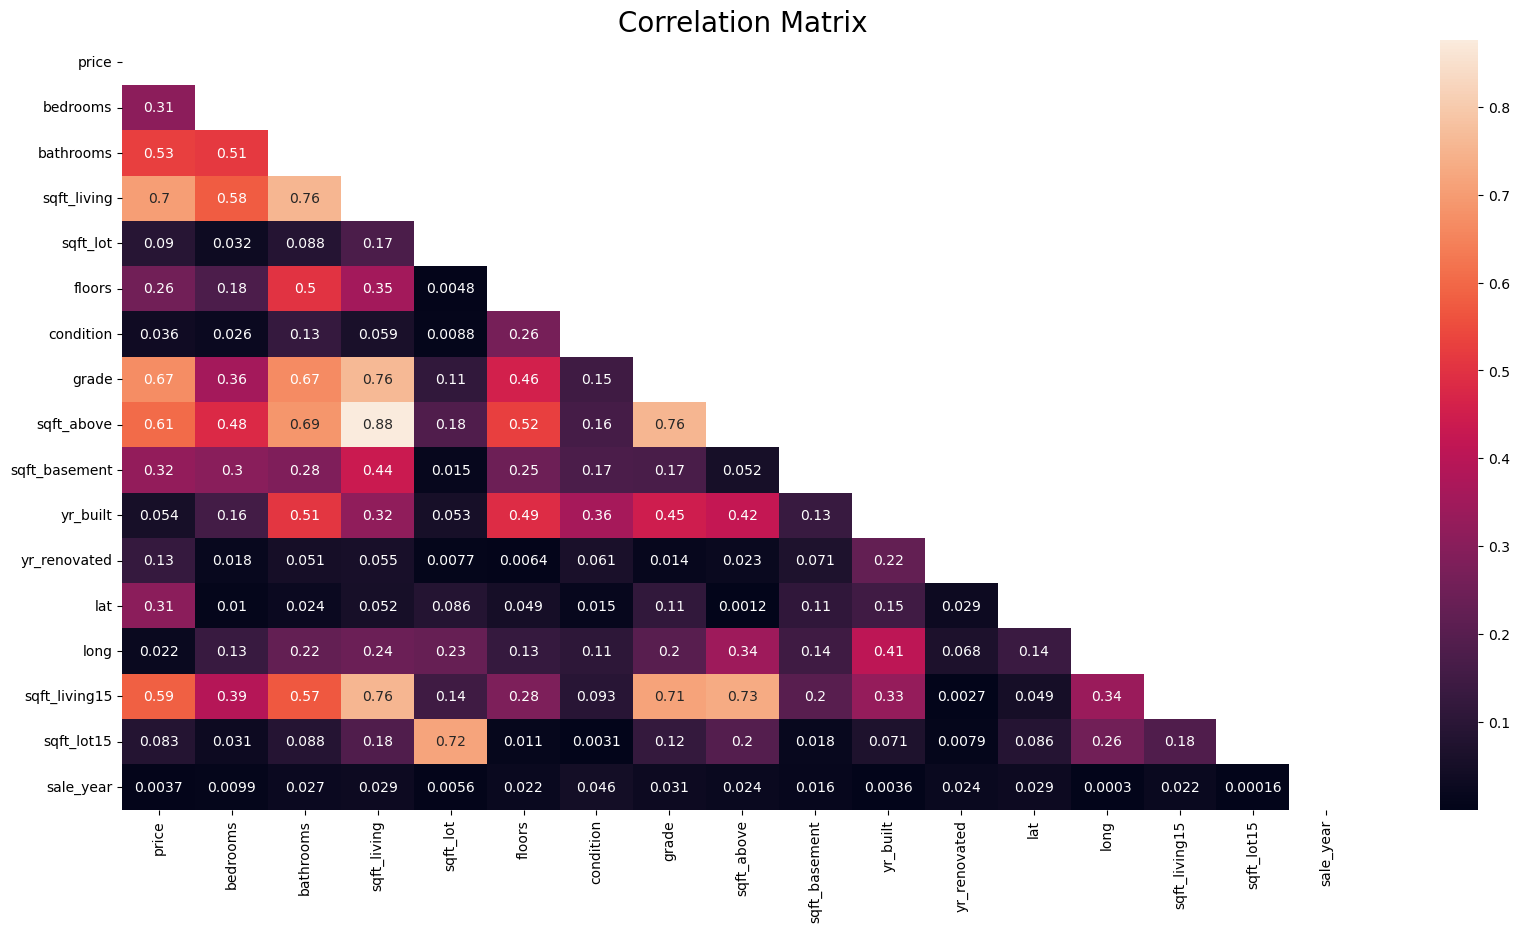

In [24]:
#heatmap
corr=np.abs(house_corr.corr())

mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=corr )
plt.title("Correlation Matrix", fontsize = 20);
plt.show()

In [25]:
corr_with_price = house_corr.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

price            1.000000
sqft_living      0.701909
grade            0.667922
sqft_above       0.605371
sqft_living15    0.585247
bathrooms        0.525905
sqft_basement    0.323776
bedrooms         0.308794
lat              0.306777
floors           0.256814
yr_renovated     0.126415
sqft_lot         0.089882
sqft_lot15       0.082837
yr_built         0.053984
condition        0.036025
long             0.022092
sale_year        0.003749
Name: price, dtype: float64


🧮Correlation matrix

For feature selection:

- May keep the features which shows a stronger correlation with target 'price' : sqft_living, grade, sqft_above, sqft_living15, bathrooms (correlation >0.5: moderate to very strong)

- Remove one of each pair with correlation >0.8 or >0.9 :yr_built and house_age(1, make sense since the house_age was calculated based on yr_built) / sqrt_living and sqrt_above(0.88)

##### Feature Importance using Xgboost

- The goal is to identify feature tha actually improve prediction or maybe to remove irrelevant or weak features
- The XGBoost model (a tree-based ensemble) can tell how much each feature contributed to the model's predictive power
- The model has different types of feature importance metrics
- The type 'gain' is the most informative: average gain in accuracy or loss reduction brought by a feature when it is used in trees 

In [26]:
# Split data
X = house._get_numeric_data().drop(['id', 'price'],axis=1)
y = house.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance

importance=model.feature_importances_
feature_importance=pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance}).sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
8,grade,0.404472
5,waterfront,0.184786
2,sqft_living,0.130565
14,lat,0.068876
15,long,0.039300
6,view,0.038421
19,house_age,0.037053
13,zipcode,0.014172
16,sqft_living15,0.014091
1,bathrooms,0.012621


In [27]:
#Remove very low-importance features (e.g., bottom 10–20%)
threshold = feature_importance['Importance'].mean() * 0.2
selected_features = feature_importance[feature_importance['Importance'] > threshold]['Feature']

In [56]:
selected_features

8             grade
5        waterfront
2       sqft_living
14              lat
15             long
6              view
19        house_age
13          zipcode
16    sqft_living15
1         bathrooms
9        sqft_above
Name: Feature, dtype: object

<Figure size 2500x2000 with 0 Axes>

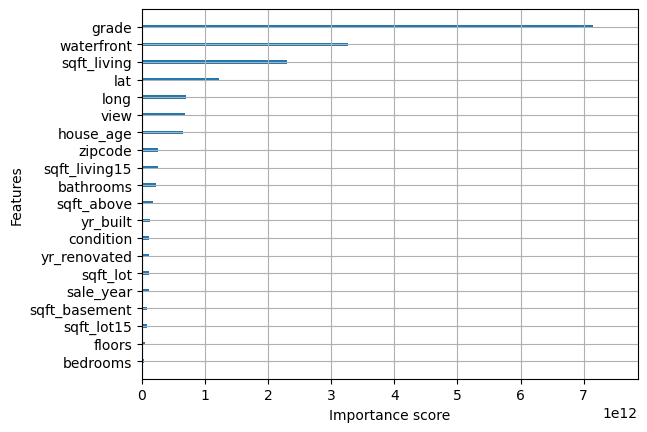

In [29]:
# Plot

plt.figure(figsize=(25, 20))
ax = xgb.plot_importance(model, importance_type='gain')

# Remove the numeric annotations beside the bars
for child in ax.get_children():
    if isinstance(child, plt.Text):
        if child.get_position()[0] > 0:  # the score texts are to the right of the bars
            child.set_visible(False)
plt.title("Feature importance", fontsize = 20)
plt.show()

🧮Feature importance

- 'grade', 'waterfront', 'sqft_living' explain about 72 % of the total model importance, it means the model relies on three features to predict price
- 'grade' (construction/finish quality/house condition) is by far the strongest driver of price, aligns with real estate logic.
-  Having a 'waterfront' property can boost prce
- Larger living area increase price

- Locaation still matters: lat, long (slightly zipcode) 

- Time and Age effects like House age, yr_built, yr_renovated 

- Weaker structural features like bathrooms, bedroom, floors

- Feature redundancy 
  sqft_living/sqft_above/sqft_basement
  yr_built/yr_renovated/house_age
  sqft_lot/sqft_lot15
  sqft_living/sqft_living15


This model is heavily driven by quality (grade) and unique location features (waterfront, lat/long).
Size (sqft_living) remains a strong linear-type driver, as expected.
“Cosmetic” features like bedrooms, floors, condition don’t matter much once the main factors are accounted for.
Age-related and lot features contribute marginally.

## 3️⃣ Feature Selection

In [28]:
house1=house.copy()

In [29]:
#only selected feature
house1=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'yr_built', 'lat', 'long', 'price']]
house1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  int64  
 6   yr_built     21597 non-null  int64  
 7   lat          21597 non-null  float64
 8   long         21597 non-null  float64
 9   price        21597 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [30]:
house_corr=house1

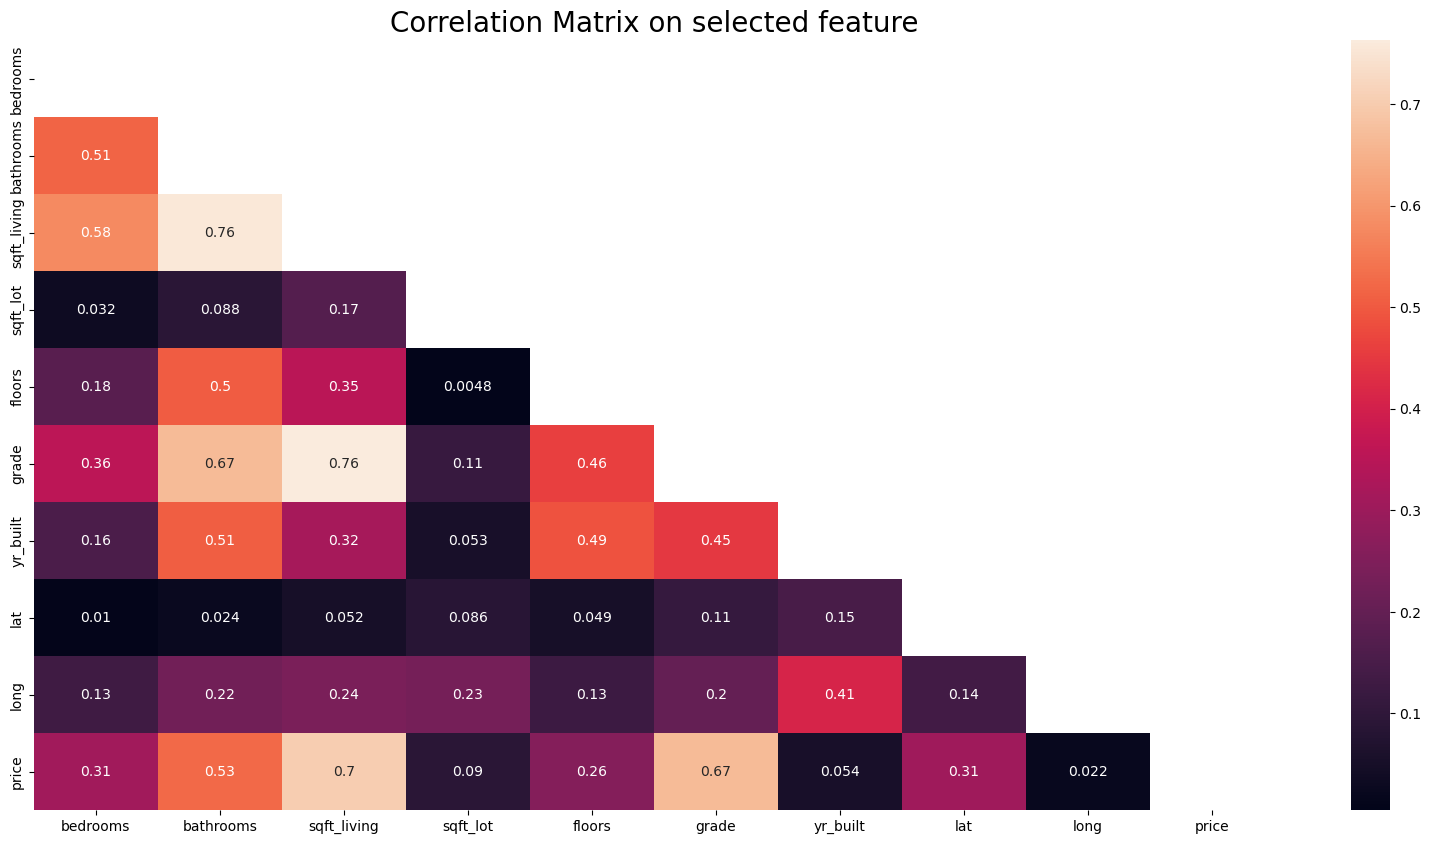

In [31]:
#heatmap
corr=np.abs(house_corr.corr())

mask=np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, annot=corr )
plt.title("Correlation Matrix on selected feature", fontsize = 20);
plt.show()

In [32]:
X=house1.drop('price', axis=1)
y=house1.price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Feature importance

importance=model.feature_importances_
feature_importance=pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importance}).sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
5,grade,0.566233
2,sqft_living,0.172771
7,lat,0.101525
8,long,0.062782
6,yr_built,0.030249
1,bathrooms,0.028203
3,sqft_lot,0.020025
4,floors,0.011234
0,bedrooms,0.006978


<Figure size 2500x2000 with 0 Axes>

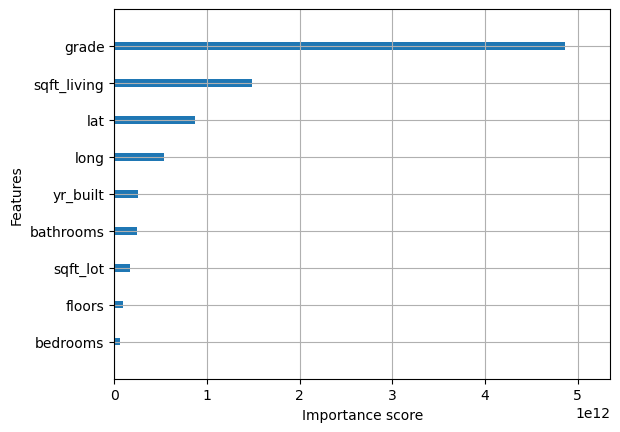

In [34]:
# Plot

plt.figure(figsize=(25, 20))
ax = xgb.plot_importance(model, importance_type='gain')

# Remove the numeric annotations beside the bars
for child in ax.get_children():
    if isinstance(child, plt.Text):
        if child.get_position()[0] > 0:  # the score texts are to the right of the bars
            child.set_visible(False)
plt.title("Feature importance", fontsize = 20)
plt.show()